In [4]:
import os
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as T
import matplotlib.pyplot as plt
from torchvision import datasets
from PIL import Image

In [5]:
os.environ["OMP_NUM_THREADS"] = "1"

mounted_drive_datasets_path = './datasets'
model_path = './outputs/best_model_kaggle.pth'
user_selfie_path = './tests/test1.jpg'

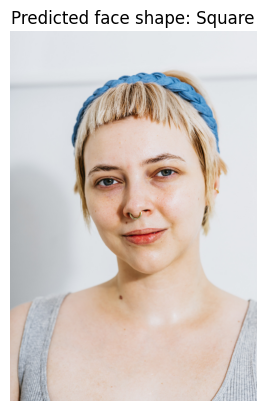

In [6]:
torch.manual_seed(42)

model = torchvision.models.efficientnet_b4(weights='EfficientNet_B4_Weights.IMAGENET1K_V1')

num_classes = 5 # 5 classes b/c 5 face shapes available in datasets
model.classifier = nn.Sequential(
    nn.Dropout(p=0.3, inplace=True),
    nn.Linear(model.classifier[1].in_features, num_classes)
    )

# Load the trained weights from the .pth file
model.load_state_dict(torch.load(model_path))

# Set the model to evaluation mode
model.eval()

# Define the preprocessing transformations
preprocess = T.Compose([
    T.Resize((224, 224)),  # Resize to match model input size
    T.ToTensor(),           # Convert to tensor
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Load and preprocess the user's selfie image
user_selfie = Image.open(user_selfie_path)
input_tensor = preprocess(user_selfie)
input_batch = input_tensor.unsqueeze(0)  # Add batch dimension

# Perform inference
with torch.no_grad():
    output = model(input_batch)

# Decode predictions
predicted_index = torch.argmax(output, dim=1).item()
face_shapes = [
    'Heart',
    'Round',
    'Oval',
    'Square',
    'Diamond',
    'Oblong']  # Replace with your actual labels

predicted_shape = face_shapes[predicted_index]

plt.imshow(user_selfie)
plt.title(f"Predicted face shape: {predicted_shape}")
plt.axis('off')
plt.show()